In [1]:
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

import fiona  # type: ignore
from fiona.crs import from_epsg # type: ignore
import geopandas as gpd  # type: ignore
import shapely # type: ignore
from shapely.geometry import Point

import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore


%matplotlib inline

In [2]:
#Read EstSoil-EH

estsoil_12c = "Data\EstSoil-EH_v1.2c.shp\EstSoil-EH_v1.2c.shp"
data = gpd.read_file(estsoil_12c,encoding='utf-8')
display(data.head())

,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,...,grassland_,area_wetla,wetland_pc,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry
0,0,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,0.000000,0.0,0.0,0.000000,0.000000,0.066504,0.003678,1808.194742,99.996322,"POLYGON ((698614.390 6447795.940, 698612.523 6..."
1,1,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((668432.067 6543565.911, 668425.630 6..."
2,2,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,71.058156,0.0,0.0,386.624055,14.876251,359.077009,13.816315,0.000000,0.000000,"POLYGON ((668550.130 6543573.200, 668543.495 6..."
3,3,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,66.551261,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((679817.320 6545854.050, 679829.522 6..."
4,4,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,98.280958,0.0,0.0,0.000000,0.000000,28.399424,1.719042,0.000000,0.000000,"POLYGON ((677362.640 6546501.230, 677345.370 6..."


In [3]:
#Drop soc1 soc2 soc3 soc4 values
no_soc_data = data.drop(["soc1","soc2","soc3","soc4"],axis=1)
no_soc_data.columns

Index(['orig_fid', 'est_soilty', 'wrb_code', 'wrb_main', 'est_txcode',
       'nlayers', 'zmx', 'z1', 'est_txt1', 'lxtype1', 'est_crs1', 'sand1',
       'silt1', 'clay1', 'rock1', 'bd1', 'k1', 'awc1', 'z2', 'est_txt2',
       'lxtype2', 'est_crs2', 'sand2', 'silt2', 'clay2', 'rock2', 'bd2', 'k2',
       'awc2', 'z3', 'est_txt3', 'lxtype3', 'est_crs3', 'sand3', 'silt3',
       'clay3', 'rock3', 'bd3', 'k3', 'awc3', 'z4', 'est_txt4', 'lxtype4',
       'est_crs4', 'sand4', 'silt4', 'clay4', 'rock4', 'bd4', 'k4', 'awc4',
       'unit_area', 'tri_mean', 'tri_stdev', 'tri_median', 'twi_mean',
       'twi_stdev', 'twi_median', 'slp_mean', 'slp_stdev', 'slp_median',
       'ls_mean', 'ls_stdev', 'ls_median', 'area_drain', 'drain_pct',
       'area_arabl', 'arable_pct', 'area_fores', 'forest_pct', 'area_grass',
       'grassland_', 'area_wetla', 'wetland_pc', 'area_urban', 'urban_pct',
       'area_water', 'water_pct', 'area_other', 'other_pct', 'geometry'],
      dtype='object')

In [4]:
#Drop all unnecessary columns(ones which are calculated based on previous SOC data and the ones which are already exist in soc_samples data)
#before joining to soc_samples data


sorted_data = no_soc_data.drop(['wrb_code','wrb_main', 'nlayers', 'est_txt1', 'lxtype1', 'est_crs1', 'bd1', 'est_txt2', 'lxtype2', 
                    'est_crs2','bd2','k1','k2','est_txt3', 'lxtype3', 'est_crs3', 'bd3', 'k3', 'est_txt4','lxtype4','est_crs4',
                       'bd4', 'k4','unit_area', 'tri_mean', 'tri_stdev', 'tri_median', 'twi_mean','twi_stdev', 'twi_median', 
                       'slp_mean', 'slp_stdev', 'slp_median',  'ls_mean', 'ls_stdev', 'ls_median', 'area_drain', 'drain_pct',
                       'area_arabl', 'arable_pct', 'area_fores', 'forest_pct', 'area_grass','grassland_', 'area_wetla', 
                       'wetland_pc', 'area_urban', 'urban_pct','area_water', 'water_pct', 'area_other', 'other_pct', 'geometry',
                       'awc1', 'awc2', 'awc3', 'awc4' ],axis=1)

sorted_data.head()



,orig_fid,est_soilty,est_txcode,zmx,z1,sand1,silt1,clay1,rock1,z2,...,z3,sand3,silt3,clay3,rock3,z4,sand4,silt4,clay4,rock4
0,0,Ag,l,1000.0,1000.0,90,5,5,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Ag,l,1000.0,1000.0,90,5,5,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Ag,l,1000.0,1000.0,90,5,5,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Ag,l,1000.0,1000.0,90,5,5,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Ag,l,1000.0,1000.0,90,5,5,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# read soc data
soc_samples = gpd.read_file('Data\data_deposit_supplements_1.2c\data_deposit_supplements_1.2c\soc_rf_model\soc_rf_redone_3301.gpkg', layer = "soc_train_samples_outrem_origfid_avg")
soc_samples.head()


,orig_fid,SOC_mean,SOC_std,SOC_med,SOC_min,SOC_max,origin,origin_p,s_count,upd_siffer,...,area_other,unit_area,arable_pct,forest_pct,grassland_pct,wetland_pct,urban_pct,water_pct,other_pct,geometry
0,15159,11.078491,0.000559,11.078491,11.078095,11.078886,estonian_alvars_soil_sample_single_dataset.shp,0.500000,2,ArG,...,20363.430457,89012.199332,0.209052,30.211757,45.509613,16.460368,0.000000,1.192456,22.877123,POINT (443390.670 6494246.123)
1,22283,1.056000,0.669724,0.840000,0.440000,2.190000,envir_biosoils_survey.shp,1.000000,5,D,...,0.000000,25583.014316,44.760985,55.239015,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (661204.025 6433312.518)
2,45116,5.339205,NaN,5.339205,5.339205,5.339205,rmk_soil_data.shp,1.000000,1,Dg,...,0.000000,1948.785206,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (593729.152 6457480.739)
3,86756,1.000000,0.000000,1.000000,1.000000,1.000000,envir_kese_muld_export.shp,1.000000,2,E2o,...,526.615939,62036.861342,82.160218,12.099221,0.000000,0.000000,4.891685,0.000000,0.848876,POINT (644275.296 6425833.836)
4,94817,4.029763,0.851630,3.514495,3.446287,5.128507,estonian_alvars_open_areas.shp,0.166667,6,Gh',...,149612.185454,354413.777500,0.515653,56.275738,0.693469,0.000000,0.035944,0.265209,42.213987,POINT (376404.901 6468198.723)


In [6]:
soc_samples.dtypes

orig_fid          int64
SOC_mean        float64
SOC_std         float64
SOC_med         float64
SOC_min         float64
                 ...   
wetland_pct     float64
urban_pct       float64
water_pct       float64
other_pct       float64
geometry       geometry
Length: 102, dtype: object

In [7]:
#merge dataframes of Soc_samples file and Estsoil-EH
merged_data = pd.merge(sorted_data, soc_samples, on= "orig_fid")
display(merged_data.sample(50))


,orig_fid,est_soilty,est_txcode,zmx,z1,sand1,silt1,clay1,rock1,z2,...,area_other,unit_area,arable_pct,forest_pct,grassland_pct,wetland_pct,urban_pct,water_pct,other_pct,geometry
186,275368,KI,v⁰₂ls₁50-70/r₂ls₂,1000.0,600.0,65,20,15,15,1000.0,...,145.245500,1.298330e+05,80.423574,1.530920,9.990469,0.000000,7.943166,0.000000,0.111871,POINT (611730.913 6498923.299)
208,316212,Kk,r₄ls₁10-20/kb,1000.0,150.0,65,20,15,40,1000.0,...,6559.981323,6.176877e+04,0.000000,87.140161,2.084501,0.155113,0.000000,0.000000,10.620224,POINT (379002.557 6486173.464)
122,248868,Kg,r₂ls₁20-30/r₃ls₁30/p,1000.0,250.0,65,20,15,15,550.0,...,0.000000,2.622706e+05,1.399037,93.419973,4.969587,0.000000,0.222695,0.000000,0.000000,POINT (443317.366 6500496.318)
252,378326,Kr,r₃ls₁/r,1000.0,500.0,65,20,15,25,1000.0,...,3881.955210,8.121356e+04,0.000000,89.158040,0.000000,0.000000,6.062025,0.000000,4.779935,POINT (445574.974 6477996.603)
269,394642,Kr,kb₃l10/kb,1000.0,100.0,90,5,5,25,1000.0,...,23016.051542,1.557656e+05,0.000000,49.874668,35.293078,0.056170,0.422692,0.000000,14.776085,POINT (466748.923 6571664.663)
388,567676,LP,v⁰₁sl50-80/v⁰₁ls₁,1000.0,650.0,82,9,9,6,1000.0,...,0.000000,2.389815e+05,84.383487,9.113091,2.123944,0.000000,4.424506,0.000000,0.000000,POINT (606061.984 6451875.642)
240,377568,Kr,kb₃sl30/p,1000.0,300.0,82,9,9,25,1000.0,...,408.308121,3.105064e+05,34.300158,20.997634,40.442379,0.000000,4.156324,0.000000,0.131498,POINT (460185.090 6501320.301)
283,440859,LI,krl200,2000.0,2000.0,90,5,5,85,NaN,...,0.000000,3.231237e+04,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (655443.368 6576448.749)
111,240964,K,r₂ls₁50-100/p,1000.0,750.0,65,20,15,15,1000.0,...,25775.877427,1.527169e+06,26.622291,55.527191,12.489768,0.000000,3.704438,0.000000,1.687821,POINT (459768.991 6490291.907)
276,436780,LI,l200,2000.0,2000.0,90,5,5,0,NaN,...,0.000000,4.796702e+05,0.000000,99.969123,0.000000,0.030877,0.000000,0.000000,0.000000,POINT (687773.438 6546147.381)


In [8]:
#columns and their types
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
merged_data.dtypes



orig_fid             int64
est_soilty          object
est_txcode          object
zmx                float64
z1                 float64
sand1                int64
silt1                int64
clay1                int64
rock1                int64
z2                 float64
sand2              float64
silt2              float64
clay2              float64
rock2              float64
z3                 float64
sand3              float64
silt3              float64
clay3              float64
rock3              float64
z4                 float64
sand4              float64
silt4              float64
clay4              float64
rock4              float64
SOC_mean           float64
SOC_std            float64
SOC_med            float64
SOC_min            float64
SOC_max            float64
origin              object
origin_p           float64
s_count              int64
upd_siffer          object
WRB_code            object
wrb_main            object
Boniteet             int64
Varv                 int64
L

In [36]:
#unnecessary columns for the RF model are being dropped
processed_data = merged_data.drop(['est_txcode','zmx', 'z2','sand2','silt2',
               'clay2', 'rock2', 'z3', 'sand3', 'silt3','clay3','rock3', 'z4', 'sand4', 'silt4', 'clay4', 'rock4',
               'SOC_std', 'SOC_med','SOC_min','SOC_max','origin','origin_p','s_count', 'WRB_code', 'Boniteet',
              'Loimis1','loimis_rec','SOL_Z2','SOL_Z3','SOL_Z4','EST_TXT2','LXTYPE2','EST_CRS2','SOL_SAND2','SOL_SILT2',
              'SOL_CLAY2', 'SOL_ROCK2','EST_TXT3','LXTYPE3','EST_CRS3','SOL_SAND3','SOL_SILT3','SOL_CLAY3','SOL_ROCK3',
              'EST_TXT4','LXTYPE4','EST_CRS4','SOL_SAND4','SOL_SILT4','SOL_CLAY4','SOL_ROCK4','SOL_SOC1','SOL_BD1',
              'SOL_BD2','SOL_SOC2','SOL_K2','SOL_AWC2','SOL_SOC3','SOL_BD3','SOL_K3','SOL_AWC3','SOL_SOC4','SOL_BD4',
              'SOL_K4','SOL_AWC4', 'USLE_K','HYDGRP','Huumus','unit_area',
              'geometry', 
                "est_soilty",'SOL_CLAY1', 'SOL_Z1','ao_hor_thick',"SOL_SILT1","SOL_SAND1",
                "ao_hor_thick","ao_hor_type","ao_hor_sel","SOL_ROCK1"
                                                ], axis=1)

processed_data.rename(columns={'SOL_K1' : 'k1', 'SOL_AWC1' : 'awc1' }, inplace=True)

processed_data.columns

Index(['orig_fid', 'z1', 'sand1', 'silt1', 'clay1', 'rock1', 'SOC_mean',
       'upd_siffer', 'wrb_main', 'Varv', 'nlayers', 'SOL_ZMX', 'EST_TXT1',
       'LXTYPE1', 'EST_CRS1', 'k1', 'awc1', 'slp_mean', 'slp_median',
       'slp_stdev', 'twi_mean', 'twi_median', 'twi_stdev', 'ls_mean',
       'ls_median', 'ls_stdev', 'tri_mean', 'tri_median', 'tri_stdev',
       'area_drain', 'drain_pct', 'area_arable', 'area_forest',
       'area_grassland', 'area_wetland', 'area_urban', 'area_water',
       'area_other', 'arable_pct', 'forest_pct', 'grassland_pct',
       'wetland_pct', 'urban_pct', 'water_pct', 'other_pct'],
      dtype='object')

In [37]:
#cheking the null values
processed_data.isnull().sum()

orig_fid            0
z1                  0
sand1               0
silt1               0
clay1               0
rock1               0
SOC_mean            0
upd_siffer          0
wrb_main            0
Varv                0
nlayers             0
SOL_ZMX             0
EST_TXT1            0
LXTYPE1             0
EST_CRS1            0
k1                  0
awc1                0
slp_mean            0
slp_median          0
slp_stdev           0
twi_mean            0
twi_median          0
twi_stdev           0
ls_mean             0
ls_median           0
ls_stdev            0
tri_mean            0
tri_median          0
tri_stdev           0
area_drain        297
drain_pct         297
area_arable         0
area_forest         0
area_grassland      0
area_wetland        0
area_urban          0
area_water          0
area_other          0
arable_pct          0
forest_pct          0
grassland_pct       0
wetland_pct         0
urban_pct           0
water_pct           0
other_pct           0
dtype: int

In [38]:
#Filling missing values with the 0 of the respective columns

processed_data["area_drain"] = processed_data["area_drain"].fillna(0)  #fill with zero

processed_data["drain_pct"] = processed_data["drain_pct"].fillna(0) #fill with zero

processed_data.isnull().sum()

orig_fid          0
z1                0
sand1             0
silt1             0
clay1             0
rock1             0
SOC_mean          0
upd_siffer        0
wrb_main          0
Varv              0
nlayers           0
SOL_ZMX           0
EST_TXT1          0
LXTYPE1           0
EST_CRS1          0
k1                0
awc1              0
slp_mean          0
slp_median        0
slp_stdev         0
twi_mean          0
twi_median        0
twi_stdev         0
ls_mean           0
ls_median         0
ls_stdev          0
tri_mean          0
tri_median        0
tri_stdev         0
area_drain        0
drain_pct         0
area_arable       0
area_forest       0
area_grassland    0
area_wetland      0
area_urban        0
area_water        0
area_other        0
arable_pct        0
forest_pct        0
grassland_pct     0
wetland_pct       0
urban_pct         0
water_pct         0
other_pct         0
dtype: int64

In [39]:
#analyzing the "object" type columns
processed_data.select_dtypes(include=["object"])

,upd_siffer,wrb_main,EST_TXT1,LXTYPE1,EST_CRS1
0,ArG,FL,ls1,SL,k⁰
1,D,UM,l,S,
2,Dg,UM,sl,LS,
3,E2o,RG,ls,L,v⁰
4,Gh',LP,sl,LS,r
...,...,...,...,...,...
467,S''',HS,t3,PEAT,
468,TxR,HS,t1,PEAT,
469,TxR,HS,t1,PEAT,
470,TxR,HS,t1,PEAT,


In [40]:
# get dummies
dummy_processed_data = pd.get_dummies(processed_data, columns = ['upd_siffer','wrb_main','EST_TXT1','LXTYPE1',
                                                              'EST_CRS1'], drop_first=True)
dummy_processed_data.rename(columns={'LXTYPE1_PEAT' : 'lxtype1_PEAT'}, inplace=True)
dummy_processed_data.info
dummy_processed_data.head()

,orig_fid,z1,sand1,silt1,clay1,rock1,SOC_mean,Varv,nlayers,SOL_ZMX,k1,awc1,slp_mean,slp_median,slp_stdev,twi_mean,twi_median,twi_stdev,ls_mean,ls_median,ls_stdev,tri_mean,tri_median,tri_stdev,area_drain,drain_pct,area_arable,area_forest,area_grassland,area_wetland,area_urban,area_water,area_other,arable_pct,forest_pct,grassland_pct,wetland_pct,urban_pct,water_pct,other_pct,upd_siffer_D,upd_siffer_Dg,upd_siffer_E2o,upd_siffer_GI,upd_siffer_GI1,upd_siffer_Gh',upd_siffer_Gh'',upd_siffer_Gk,upd_siffer_Gkr,upd_siffer_Go,upd_siffer_Go1,upd_siffer_Gor,upd_siffer_Gr,upd_siffer_K,upd_siffer_KI,upd_siffer_KIg,upd_siffer_Kg,upd_siffer_Kh',upd_siffer_Kh'',upd_siffer_Kh''g,upd_siffer_Kh'g,upd_siffer_Kk,upd_siffer_Ko,upd_siffer_Kog,upd_siffer_Korg,upd_siffer_Kr,upd_siffer_Krg,upd_siffer_L(k)I,upd_siffer_L(k)IIg,upd_siffer_L(k)Ig,upd_siffer_LG,upd_siffer_LG1,upd_siffer_LGn,upd_siffer_LI,upd_siffer_LII,upd_siffer_LIIg,upd_siffer_LIg,upd_siffer_LP,upd_siffer_LPG,upd_siffer_LPg,upd_siffer_LkG,upd_siffer_LkI,upd_siffer_LkII,upd_siffer_LkIIg,upd_siffer_LkIg,upd_siffer_M'',upd_siffer_M''',upd_siffer_Pp,upd_siffer_Pu,upd_siffer_R''',upd_siffer_S',upd_siffer_S'',upd_siffer_S''',upd_siffer_TxR,wrb_main_FL,wrb_main_GL,wrb_main_HS,wrb_main_LP,wrb_main_LV,wrb_main_PZ,wrb_main_RG,wrb_main_RT,wrb_main_TC,wrb_main_UM,EST_TXT1_l,EST_TXT1_ls,EST_TXT1_ls1,EST_TXT1_ls2,EST_TXT1_pl,EST_TXT1_r,EST_TXT1_s,EST_TXT1_sl,EST_TXT1_sl1,EST_TXT1_t1,EST_TXT1_t2,EST_TXT1_t3,EST_TXT1_tls,EST_TXT1_tsl,EST_TXT1_v3,EST_TXT1_v5,LXTYPE1_GRAVELS,LXTYPE1_L,LXTYPE1_LS,lxtype1_PEAT,LXTYPE1_S,LXTYPE1_SL,LXTYPE1_SiL,EST_CRS1_k,EST_CRS1_kb,EST_CRS1_kr,EST_CRS1_k⁰,EST_CRS1_r,EST_CRS1_v,EST_CRS1_v⁰
0,15159,1000.0,65,20,15,25,11.078491,15,1.0,1000.0,11.02,0.195208,1.169605,0.910082,0.901063,9.929913,9.657865,1.696798,5.253636,0.279295,10.367961,1.392533e+23,1.575201e+23,6.919626e+23,0.0,0.00,186.081469,26892.148947,40509.107083,14651.735166,0.000000,1061.431376,20363.430457,0.209052,30.211757,45.509613,16.460368,0.000000,1.192456,22.877123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,22283,1000.0,90,5,5,0,1.056000,19,1.0,1000.0,133.21,0.181111,4.684322,4.218450,1.924464,7.979711,7.997821,1.189848,1.067075,0.863344,0.509742,3.796084e+00,3.947504e+00,1.222080e+00,0.0,0.00,11451.209081,14131.805235,0.000000,0.000000,0.000000,0.000000,0.000000,44.760985,55.239015,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,45116,1000.0,82,9,9,0,5.339205,19,1.0,1000.0,37.54,0.191667,2.132079,1.824831,1.155190,7.091621,6.264889,1.521681,0.455225,0.602095,0.229011,3.376664e+00,3.284537e+00,3.719893e-01,0.0,0.00,0.000000,1948.785206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,86756,1000.0,55,30,15,6,1.000000,18,1.0,1000.0,9.04,0.185333,1.856459,1.629892,1.202796,6.851544,6.750208,0.904073,0.258317,0.177129,0.252912,1.921934e+00,1.777000e+00,7.756198e-01,13859.0,22.34,50969.620733,7505.976949,0.000000,0.000000,3034.647721,0.000000,526.615939,82.160218,12.099221,0.000000,0.000000,4.891685,0.000000,0.848876,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,94817,1000.0,82,9,9,25,4.029763,13,1.0,1000.0,37.54,0.188772,0.563358,0.332539,0.544532,9.348648,9.025871,1.808803,0.069468,0.033145,0.095859,4.843221e-01,3.210009e-01,3.651608e-01,0.0,0.00,1827.544454,199448.969757,2457.748481,0.000000,127.3909

In [44]:
#making sure that neither categorical column left 
dummy_processed_data.select_dtypes(include=["object"])

""
0
1
2
3
4
...
467
468
469
470


In [45]:
#Splitting data for machine learning

y = np.array(dummy_processed_data['SOC_mean'])

x = dummy_processed_data.drop(['SOC_mean'], axis =1)


#Checking the shapes of data

print(f'x : {x.shape}')
print(f'y : {y.shape}')


x : (472, 133)
y : (472,)


In [46]:
#splitting data into test and train set
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 101)

In [47]:
print(f'x_train : {x_train.shape}')
print(f'y_tain : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (354, 133)
y_tain : (354,)
x_test : (118, 133)
y_test : (118,)


In [48]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor 
randomforest = RandomForestRegressor()

<h1>Recursive feature elemination <h1>

In [49]:
rfe_m = RFE(estimator=randomforest, step=1)
rfe_m = rfe_m.fit(x_train,y_train)

In [50]:
selected_rfe_features = pd.DataFrame({"Feature":list(x_train.columns),
                                     "Ranking": rfe_m.ranking_})
selected_rfe_features.sort_values(by="Ranking")

,Feature,Ranking
0,orig_fid,1
35,wetland_pct,1
36,urban_pct,1
37,water_pct,1
38,other_pct,1
42,upd_siffer_GI,1
52,upd_siffer_K,1
64,upd_siffer_Kr,1
67,upd_siffer_L(k)IIg,1
74,upd_siffer_LIIg,1


In [52]:
x_train_rfe = rfe_m.transform(x_train)
x_test_rfe = rfe_m.transform(x_test)

In [77]:
fin_rfe_model =  randomforest.fit(x_train_rfe,y_train)

In [64]:
#Accuracy of Basic Random Forest Model
print (f'Train Accuracy - : {randomforest.score(x_train_rfe,y_train):.3f}')
print (f'Test Accuracy - : {randomforest.score(x_test_rfe,y_test):.3f}')

Train Accuracy - : 0.968
Test Accuracy - : 0.755


Test accuracy and train accuracy are almost the same when feature elemination done by  RFE and Manually

RFE selected 66 out of 133 columns

 <h1>Recursive feature elemination with cross validation<h1>

In [66]:
from sklearn.feature_selection import RFECV

In [67]:
rfecv = RFECV(estimator=randomforest, step=1, cv=5, scoring="r2")


In [68]:
rfecv= rfecv.fit(x_train, y_train)

In [69]:
print("Optimal number of features :", rfecv.n_features_)
print("Best features :", x_train.columns[rfecv.support_])

Optimal number of features : 124
Best features : Index(['orig_fid', 'z1', 'sand1', 'silt1', 'clay1', 'rock1', 'Varv', 'nlayers',
       'SOL_ZMX', 'k1',
       ...
       'LXTYPE1_S', 'LXTYPE1_SL', 'LXTYPE1_SiL', 'EST_CRS1_k', 'EST_CRS1_kb',
       'EST_CRS1_kr', 'EST_CRS1_k⁰', 'EST_CRS1_r', 'EST_CRS1_v',
       'EST_CRS1_v⁰'],
      dtype='object', length=124)


In [72]:
#Accuracy of Basic Random Forest Model
print (f'Train Accuracy - : {rfecv.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rfecv.score(x_test,y_test):.3f}')

Train Accuracy - : 0.969
Test Accuracy - : 0.760


C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


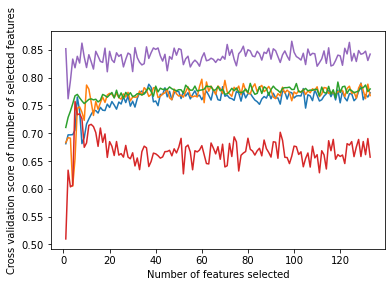

In [73]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

 <h1>Training Model Evaluation<h1>

In [79]:
y_predict_train = fin_rfe_model.predict((x_train_rfe))

In [80]:
#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics

r_square_train = metrics.r2_score(y_train, y_predict_train)
print('R-Square Error associated with Random Forest Regression is: %.2f'%r_square_train)

R-Square Error associated with Random Forest Regression is: 0.97


In [83]:
#Mean absolute error evaluation
from sklearn.metrics import mean_absolute_error

print("The MAE is: %.2f" % mean_absolute_error(y_train, y_predict_train))    

The MAE is: 0.88


In [84]:
from sklearn.metrics import mean_squared_error
#Mean square error evaluation

print('Root Mean Squared Error associated with Random Forest Regression is: %.2f'%np.sqrt(mean_squared_error(y_train, y_predict_train)))

rmsep = np.sqrt(np.mean(np.square(((y_train - y_predict_train) / y_train)), axis=0)) 
print ( "Root Mean Squared Error in percentage: %.2f"% rmsep)

Root Mean Squared Error associated with Random Forest Regression is: 1.40
Root Mean Squared Error in percentage: 0.98


In [86]:
#Mean absolute error calculation
from sklearn.metrics import explained_variance_score

print("The EVS is: %.2f" % explained_variance_score(y_train, y_predict_train))  

The EVS is: 0.97


 <h1>Test Model Evaluation<h1>

In [88]:
y_predict_test = fin_rfe_model.predict(x_test_rfe)

In [89]:
#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics

r_square = metrics.r2_score(y_test, y_predict_test)
print('R-Square Error associated with Random Forest Regression is: %.2f'%r_square)

R-Square Error associated with Random Forest Regression is: 0.75


In [90]:
#Mean absolute error evaluation
from sklearn.metrics import mean_absolute_error

print("The MAE is: %.2f" % mean_absolute_error(y_test, y_predict_test))      

The MAE is: 2.68


In [91]:
from sklearn.metrics import mean_squared_error
#Mean square error evaluation

print('Root Mean Squared Error associated with Random Forest Regression is: %.2f'%np.sqrt(mean_squared_error(y_test, y_predict_test)))

rmsep = np.sqrt(np.mean(np.square(((y_test - y_predict_test) / y_test)), axis=0)) 
print ( "Root Mean Squared Error in percentage: %.2f"% rmsep)

Root Mean Squared Error associated with Random Forest Regression is: 4.19
Root Mean Squared Error in percentage: 1.85


In [92]:
#Mean absolute error calculation
from sklearn.metrics import explained_variance_score

print("The EVS is: %.2f" % explained_variance_score(y_test, y_predict_test))    

The EVS is: 0.76
